<a href="https://colab.research.google.com/github/harshareddy2608/Pytorch_learning/blob/main/Day_5_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch Workflow


Day-4 is as follows!!!!

### Day-5 starts after training the model part

Step_1: data preprocessing
Step_2: build model
Step_3: fitting the model to data(training)
Step_4: making predictions and evaluting a model
Step_5: saving and loading a model
Step_6: putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [2]:
#Data preprocessing


weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X= torch.arange(start ,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b" , s=4 ,label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4 , label="Predictions")

  plt.legend(prop={"size": 14});

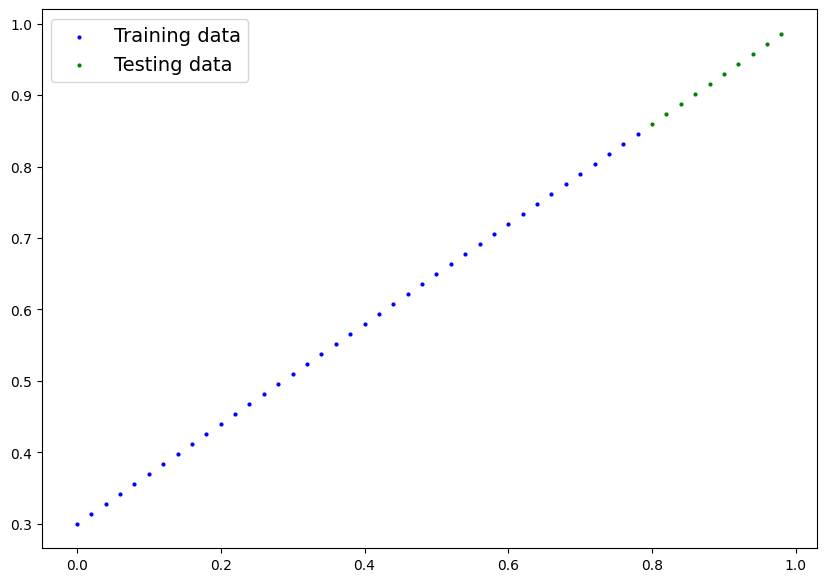

In [6]:
plot_predictions();

In [26]:
# building model

#creating linear regressin model class
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [27]:
torch.manual_seed(42)
torch.rand(1)

tensor([0.8823])

In [68]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [69]:
# List named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [70]:
weight, bias

(0.7, 0.3)

In [71]:
#make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [72]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

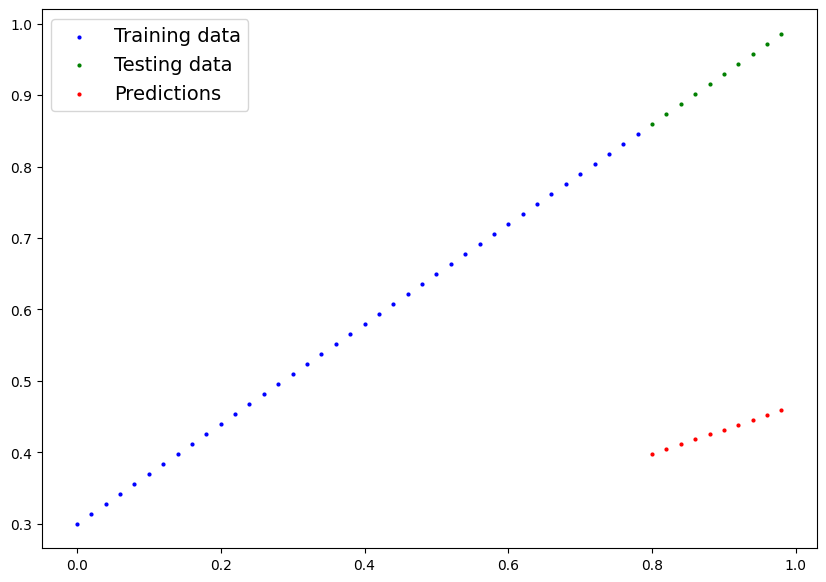

In [73]:
plot_predictions(predictions=y_preds)

## 3.Train Model

In [74]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [75]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [76]:
#setting a loss function

loss_fn = nn.L1Loss()


#setup an optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

Lets continue in next half Day-5 starts here!

In [91]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values =[]


for epoch in range(epochs):
  model_0.train()
 #step-1
  y_pred = model_0(X_train)
 #step-2
  loss = loss_fn(y_pred, y_train)
 #step-3
  optimizer.zero_grad()
 #step-4
  loss.backward()
 #step-5
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} |Loss: {loss} | Test loss: {test_loss}")

    print(model_0.state_dict())

Epoch:0 |Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:10 |Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:20 |Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:30 |Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:40 |Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:50 |Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch:60 |Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.299

In [92]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

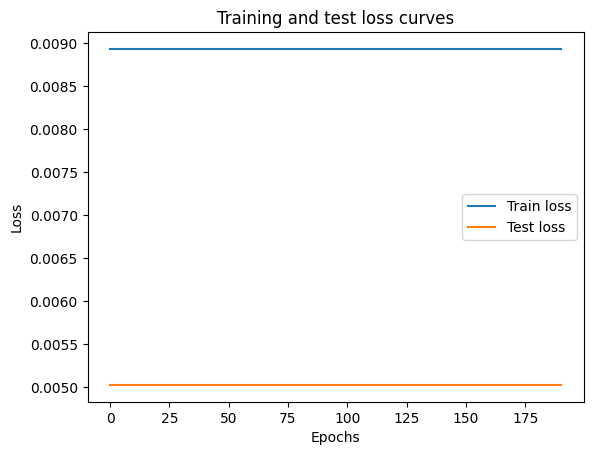

In [95]:
#plot the loss curves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [83]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


In [62]:
weight , bias


(0.7, 0.3)

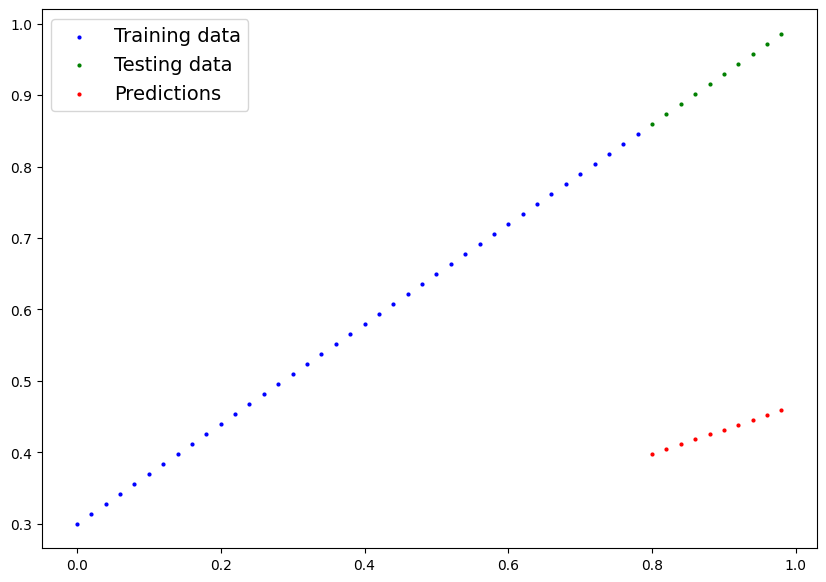

In [63]:
plot_predictions(predictions=y_preds);

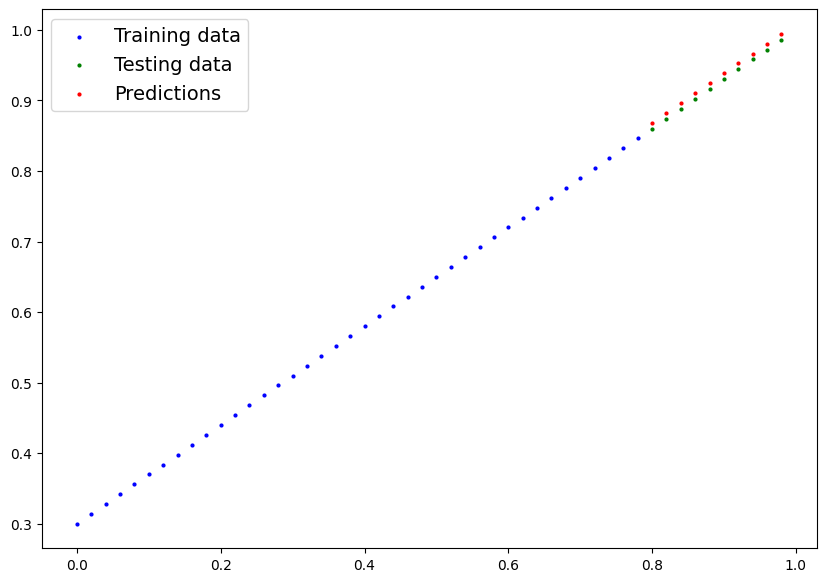

In [64]:
plot_predictions(predictions=y_preds_new);

## Saving a model in Pytorch

In [96]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [100]:
from pathlib import Path

MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME= "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



saving model to :models/01_pytorch_workflow_model_0.pth


In [101]:
ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 14 17:10 01_pytorch_workflow_model_0.pth


In [103]:
#loading a pytorch model

loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [104]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [106]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [108]:
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

  y_preds

In [109]:
#comparing loaded model and orginal model

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### we are completed with the Pytorch workflow!!!!!!!